In [1]:
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# Script for generic plots of ISSM output
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

from MatlabFuncs import *
from model import *
from triangle import *
from bamg import bamg
from savevars import *
import plotdoc
from loadmodel import *
from os.path import exists

from scipy.io import loadmat
from m1qn3inversion import *
import numpy as np
from ContourToNodes import *
from solve import *

import matplotlib.pyplot as plt
import numpy as np
import pickle

import pylab as pl


In [2]:
md = loadmodel("./Models/SAtoES_relaxation_rignot.nc")

Opening ./Models/SAtoES_relaxation_rignot.nc for reading 
solidearthsettings.solidearthsettings
lovenumbers.lovenumbers
rotational.rotational
results.results
results.solutionstep
empty init
WARNING, StressbalanceConvergenceNumSteps is not present on every times, we chose DimNum10(1) as the dimension to write it with


Text(0.5, 0, 'thickness change (m)')

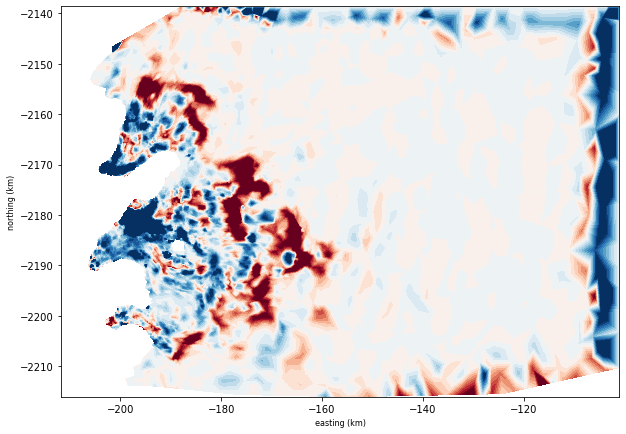

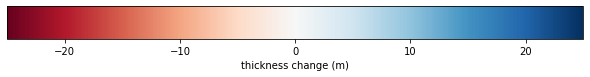

In [18]:
# Changes in ice thickness
cmap = 'RdBu'

thickness_change = md.results.TransientSolution[-1].Thickness - md.geometry.thickness

fig = plt.figure(figsize=(10,10))
vmin = -25
vmax = +25
plotmodel(md, 'data', thickness_change, 'mask', md.results.TransientSolution[-1].MaskIceLevelset<=0, \
         'colormap', cmap, 'caxis', [vmin, vmax], 'colorbar', 'off', \
         'unit', 'km', 'xlabel', 'easting (km)', 'ylabel', 'northing (km)', \
         'backgroundcolor', 'white')
# for masking: 'mask#all', md.mask.ice_levelset<=0

# colorbar
a = np.array([[vmin,vmax]])
pl.figure(figsize=(10, 0.75))
img = pl.imshow(a, cmap=cmap)
pl.gca().set_visible(False)
cax = pl.axes([0.1, 0.2, 0.8, 0.6])
pl.colorbar(orientation='horizontal', cax=cax)
pl.xlabel('thickness change (m)')
